# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [41]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [42]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [43]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207103e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [44]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.0189654196061


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [45]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 1.276034e-10
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171436458155


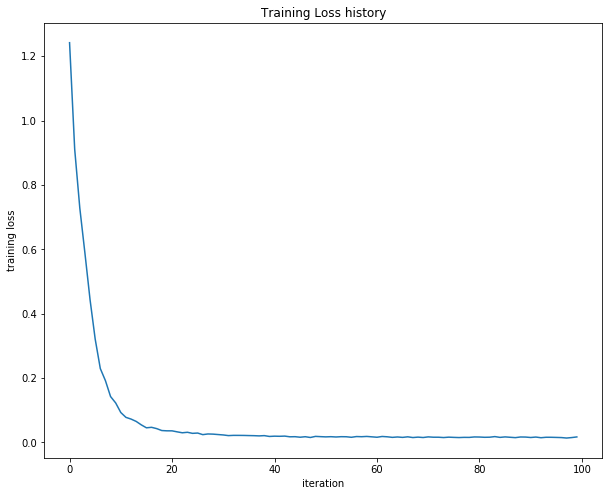

In [46]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [47]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [49]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=400,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302964
iteration 100 / 1000: loss 1.910001
iteration 200 / 1000: loss 1.824436
iteration 300 / 1000: loss 1.664942
iteration 400 / 1000: loss 1.628437
iteration 500 / 1000: loss 1.569497
iteration 600 / 1000: loss 1.595376
iteration 700 / 1000: loss 1.514661
iteration 800 / 1000: loss 1.480232
iteration 900 / 1000: loss 1.474020
Validation accuracy:  0.481


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

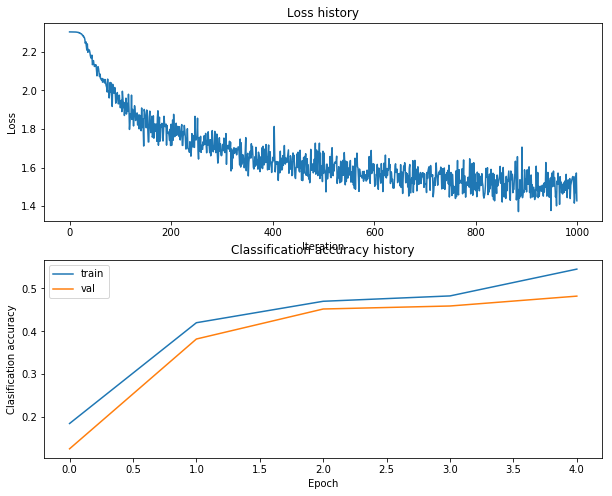

In [50]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

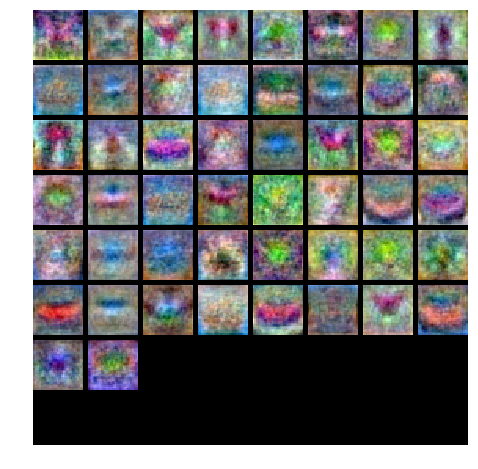

In [51]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [58]:
def zeroMean(dataMat):
    meanVal = np.mean(dataMat, axis=0)  #按列求均值，即求各个特征的均值
    newData = dataMat - meanVal
    return newData, meanVal


def percentage2n(eigVals, percentage):
    sortArray = np.sort(eigVals)  #升序
    sortArray = sortArray[-1::-1]  #逆转，即降序
    arraySum = sum(sortArray)
    tmpSum = 0
    num = 0
    for i in sortArray:
        tmpSum += i
        num += 1
        if tmpSum >= arraySum * percentage:
            return num


def pca(dataMat, percentage=0.99):
    newData = dataMat
    covMat = np.cov(
        newData,
        rowvar=0)  #求协方差矩阵,return ndarray；若rowvar非0，一列代表一个样本，为0，一行代表一个样本
    eigVals, eigVects = np.linalg.eig(
        np.mat(covMat))  #求特征值和特征向量,特征向量是按列放的，即一列代表一个特征向量
    n = percentage2n(eigVals, percentage)  #要达到percent的方差百分比，需要前n个特征向量
    eigValIndice = np.argsort(eigVals)  #对特征值从小到大排序
    n_eigValIndice = eigValIndice[-1:-(n + 1):-1]  #最大的n个特征值的下标
    n_eigVect = eigVects[:, n_eigValIndice]  #最大的n个特征值对应的特征向量
    print(n_eigVect.shape)
    lowDDataMat = newData.dot(n_eigVect)  #低维特征空间的数据
    return lowDDataMat, n_eigVect, eigVals[n_eigValIndice]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print()

Xr, eigVect, eigVal = pca(X_train)
Xv = X_val.dot(eigVect)
Xe = X_test.dot(eigVect)

print(Xr.std(axis=0))
print(eigVal)

Xr = X_train
Xv = X_val
Xe = X_test

yr = y_train
yv = y_val
ye = y_test

print(Xr.shape)
print(Xv.shape)
print(Xe.shape)
print(yr.shape)
print(yv.shape)
print(ye.shape)
print()

input_size = Xr.shape[1]
print(input_size)

num_classes = 10

(49000, 3072)
(1000, 3072)
(1000, 3072)
(49000,)
(1000,)
(1000,)

(3072, 658)
[[ 1897.22505257  1181.0244407    909.96312822   674.58432628
    668.52979915   590.3750915    579.3723944    518.22552091
    505.30499045   422.15403906   402.8437791    363.46587276
    360.72372347   352.32045248   337.31138991   318.17974185
    302.59903673   297.70178052   291.5896499    282.19878131   271.4677777
    269.478111     248.01103004   246.54329054   243.84098645
    240.31644732   236.40691155   234.42830245   222.74850517
    220.86635897   212.78495694   203.10849283   200.40875863
    196.10550597   195.11545004   190.06388736   179.84949444
    179.15574907   177.56932382   175.54137886   173.30094612
    168.59647384   167.97566781   165.54074625   161.43496983
    160.03454926   154.37448822   153.49883855   151.1608057    150.05609645
    148.57698489   146.61564913   145.69800164   144.98901295
    141.87433666   140.16582891   139.08684135   138.17870126
    137.70805697   136.33

hidden_size: 5.000000e+01 learning_rates: 1.000000e-03 regularization_strengths: 0.000000e+00
iteration 0 / 4000: loss 2.302588
iteration 100 / 4000: loss 1.946684
iteration 200 / 4000: loss 1.758640
iteration 300 / 4000: loss 1.646863
iteration 400 / 4000: loss 1.590747
iteration 500 / 4000: loss 1.680051
iteration 600 / 4000: loss 1.464521
iteration 700 / 4000: loss 1.501172
iteration 800 / 4000: loss 1.429611
iteration 900 / 4000: loss 1.395867
iteration 1000 / 4000: loss 1.374875
iteration 1100 / 4000: loss 1.321222
iteration 1200 / 4000: loss 1.376145
iteration 1300 / 4000: loss 1.380523
iteration 1400 / 4000: loss 1.314596
iteration 1500 / 4000: loss 1.371059
iteration 1600 / 4000: loss 1.362393
iteration 1700 / 4000: loss 1.347657
iteration 1800 / 4000: loss 1.236966
iteration 1900 / 4000: loss 1.198670
iteration 2000 / 4000: loss 1.302248
iteration 2100 / 4000: loss 1.231866
iteration 2200 / 4000: loss 1.195257
iteration 2300 / 4000: loss 1.257334
iteration 2400 / 4000: loss 1.

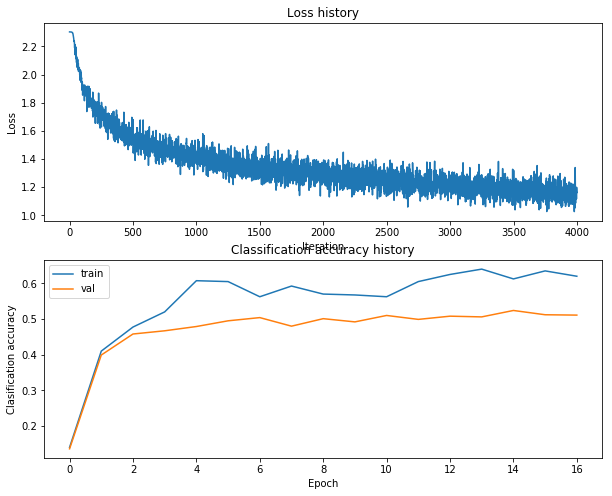

hidden_size: 5.000000e+01 learning_rates: 1.000000e-03 regularization_strengths: 5.000000e-01
iteration 0 / 4000: loss 2.302998
iteration 100 / 4000: loss 1.934144
iteration 200 / 4000: loss 1.770873
iteration 300 / 4000: loss 1.675742
iteration 400 / 4000: loss 1.642231
iteration 500 / 4000: loss 1.541350
iteration 600 / 4000: loss 1.620291
iteration 700 / 4000: loss 1.556047
iteration 800 / 4000: loss 1.508671
iteration 900 / 4000: loss 1.567039
iteration 1000 / 4000: loss 1.523492
iteration 1100 / 4000: loss 1.389735
iteration 1200 / 4000: loss 1.452694
iteration 1300 / 4000: loss 1.527952
iteration 1400 / 4000: loss 1.396434
iteration 1500 / 4000: loss 1.420943
iteration 1600 / 4000: loss 1.496665
iteration 1700 / 4000: loss 1.395493
iteration 1800 / 4000: loss 1.374701
iteration 1900 / 4000: loss 1.428619
iteration 2000 / 4000: loss 1.420840
iteration 2100 / 4000: loss 1.456911
iteration 2200 / 4000: loss 1.483434
iteration 2300 / 4000: loss 1.483437
iteration 2400 / 4000: loss 1.

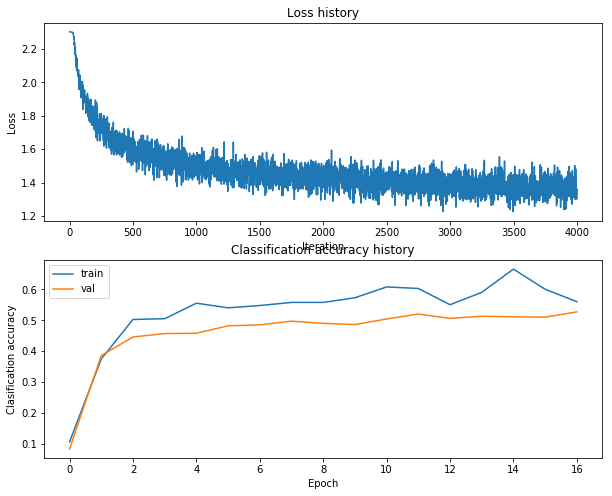

hidden_size: 5.000000e+01 learning_rates: 3.000000e-03 regularization_strengths: 0.000000e+00
iteration 0 / 4000: loss 2.302614
iteration 100 / 4000: loss 1.703954
iteration 200 / 4000: loss 1.694225
iteration 300 / 4000: loss 1.488308
iteration 400 / 4000: loss 1.554912
iteration 500 / 4000: loss 1.413149
iteration 600 / 4000: loss 1.504836
iteration 700 / 4000: loss 1.571611
iteration 800 / 4000: loss 1.568046
iteration 900 / 4000: loss 1.423419
iteration 1000 / 4000: loss 1.500728
iteration 1100 / 4000: loss 1.521508
iteration 1200 / 4000: loss 1.434677
iteration 1300 / 4000: loss 1.397132
iteration 1400 / 4000: loss 1.452924
iteration 1500 / 4000: loss 1.320727
iteration 1600 / 4000: loss 1.380468
iteration 1700 / 4000: loss 1.274988
iteration 1800 / 4000: loss 1.243211
iteration 1900 / 4000: loss 1.343638
iteration 2000 / 4000: loss 1.226261
iteration 2100 / 4000: loss 1.255090
iteration 2200 / 4000: loss 1.331313
iteration 2300 / 4000: loss 1.166168
iteration 2400 / 4000: loss 1.

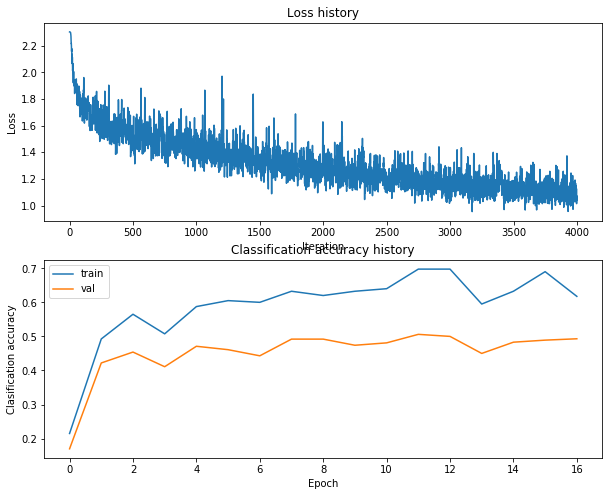

hidden_size: 5.000000e+01 learning_rates: 3.000000e-03 regularization_strengths: 5.000000e-01
iteration 0 / 4000: loss 2.302969
iteration 100 / 4000: loss 1.800195
iteration 200 / 4000: loss 1.695711
iteration 300 / 4000: loss 1.609037
iteration 400 / 4000: loss 1.698011
iteration 500 / 4000: loss 1.512253
iteration 600 / 4000: loss 1.620981
iteration 700 / 4000: loss 1.702686
iteration 800 / 4000: loss 1.457423
iteration 900 / 4000: loss 1.585340
iteration 1000 / 4000: loss 1.555644
iteration 1100 / 4000: loss 1.538282
iteration 1200 / 4000: loss 1.555951
iteration 1300 / 4000: loss 1.528751
iteration 1400 / 4000: loss 1.445638
iteration 1500 / 4000: loss 1.467450
iteration 1600 / 4000: loss 1.491920
iteration 1700 / 4000: loss 1.449803
iteration 1800 / 4000: loss 1.513324
iteration 1900 / 4000: loss 1.674663
iteration 2000 / 4000: loss 1.501579
iteration 2100 / 4000: loss 1.504584
iteration 2200 / 4000: loss 1.608358
iteration 2300 / 4000: loss 1.438615
iteration 2400 / 4000: loss 1.

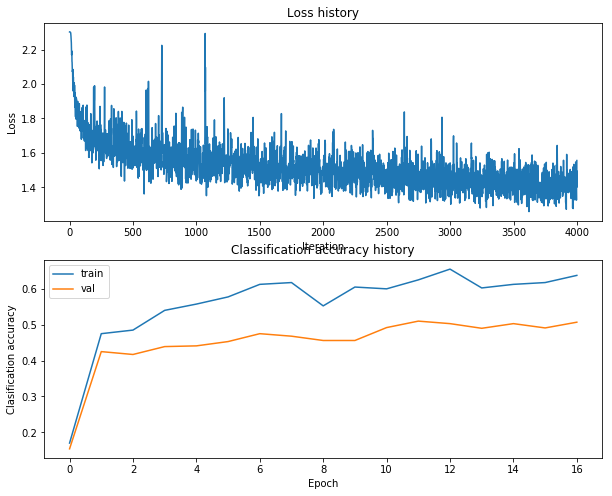

hidden_size: 1.000000e+02 learning_rates: 1.000000e-03 regularization_strengths: 0.000000e+00
iteration 0 / 4000: loss 2.302559
iteration 100 / 4000: loss 1.925654
iteration 200 / 4000: loss 1.702645
iteration 300 / 4000: loss 1.651023
iteration 400 / 4000: loss 1.603256
iteration 500 / 4000: loss 1.636017
iteration 600 / 4000: loss 1.526428
iteration 700 / 4000: loss 1.425374
iteration 800 / 4000: loss 1.345442
iteration 900 / 4000: loss 1.440399
iteration 1000 / 4000: loss 1.409366
iteration 1100 / 4000: loss 1.285508
iteration 1200 / 4000: loss 1.425839
iteration 1300 / 4000: loss 1.278875
iteration 1400 / 4000: loss 1.229908
iteration 1500 / 4000: loss 1.251158
iteration 1600 / 4000: loss 1.263066
iteration 1700 / 4000: loss 1.241661
iteration 1800 / 4000: loss 1.195046
iteration 1900 / 4000: loss 1.224061
iteration 2000 / 4000: loss 1.188568
iteration 2100 / 4000: loss 1.175334
iteration 2200 / 4000: loss 1.228952
iteration 2300 / 4000: loss 1.204325
iteration 2400 / 4000: loss 1.

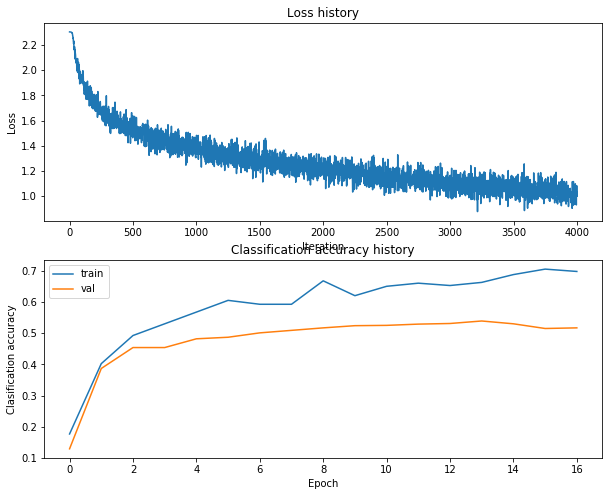

hidden_size: 1.000000e+02 learning_rates: 1.000000e-03 regularization_strengths: 5.000000e-01
iteration 0 / 4000: loss 2.303332
iteration 100 / 4000: loss 1.946836
iteration 200 / 4000: loss 1.788296
iteration 300 / 4000: loss 1.555532
iteration 400 / 4000: loss 1.605565
iteration 500 / 4000: loss 1.564557
iteration 600 / 4000: loss 1.501844
iteration 700 / 4000: loss 1.526306
iteration 800 / 4000: loss 1.435572
iteration 900 / 4000: loss 1.426355
iteration 1000 / 4000: loss 1.540805
iteration 1100 / 4000: loss 1.443676
iteration 1200 / 4000: loss 1.381761
iteration 1300 / 4000: loss 1.374369
iteration 1400 / 4000: loss 1.409993
iteration 1500 / 4000: loss 1.343663
iteration 1600 / 4000: loss 1.397020
iteration 1700 / 4000: loss 1.434079
iteration 1800 / 4000: loss 1.454221
iteration 1900 / 4000: loss 1.319288
iteration 2000 / 4000: loss 1.373298
iteration 2100 / 4000: loss 1.386630
iteration 2200 / 4000: loss 1.297896
iteration 2300 / 4000: loss 1.325914
iteration 2400 / 4000: loss 1.

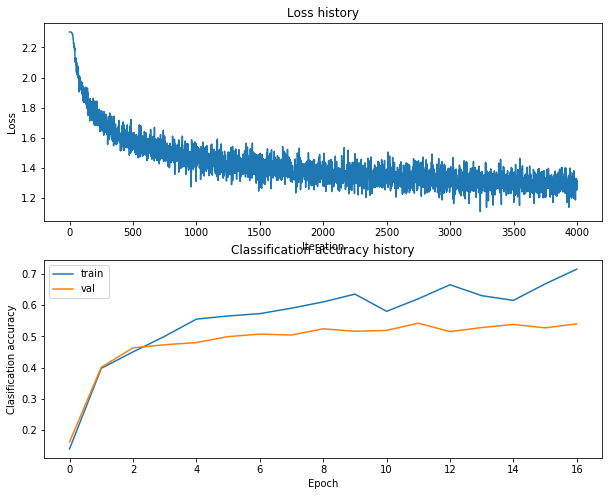

hidden_size: 1.000000e+02 learning_rates: 3.000000e-03 regularization_strengths: 0.000000e+00
iteration 0 / 4000: loss 2.302590
iteration 100 / 4000: loss 1.693654
iteration 200 / 4000: loss 1.639960
iteration 300 / 4000: loss 1.502456
iteration 400 / 4000: loss 1.507207
iteration 500 / 4000: loss 1.625207
iteration 600 / 4000: loss 1.551046
iteration 700 / 4000: loss 1.528094
iteration 800 / 4000: loss 1.479488
iteration 900 / 4000: loss 1.444914
iteration 1000 / 4000: loss 1.413792
iteration 1100 / 4000: loss 1.335428
iteration 1200 / 4000: loss 1.428572
iteration 1300 / 4000: loss 1.409736
iteration 1400 / 4000: loss 1.427189
iteration 1500 / 4000: loss 1.315107
iteration 1600 / 4000: loss 1.218198
iteration 1700 / 4000: loss 1.136378
iteration 1800 / 4000: loss 1.119432
iteration 1900 / 4000: loss 1.254691
iteration 2000 / 4000: loss 1.221329
iteration 2100 / 4000: loss 1.162606
iteration 2200 / 4000: loss 1.267259
iteration 2300 / 4000: loss 1.271801
iteration 2400 / 4000: loss 1.

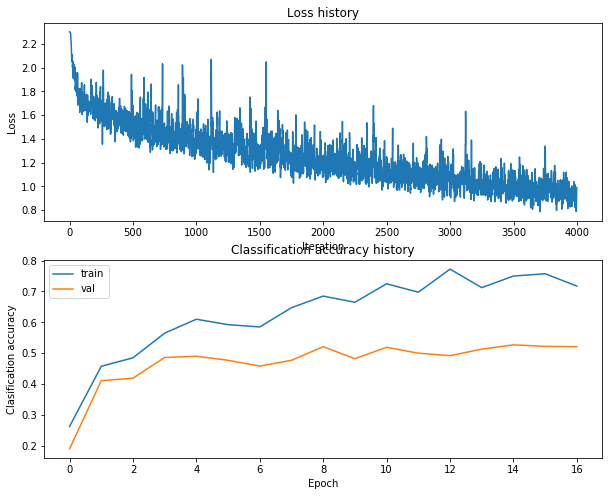

hidden_size: 1.000000e+02 learning_rates: 3.000000e-03 regularization_strengths: 5.000000e-01
iteration 0 / 4000: loss 2.303373
iteration 100 / 4000: loss 1.818422
iteration 200 / 4000: loss 1.544151
iteration 300 / 4000: loss 1.917909
iteration 400 / 4000: loss 1.721731
iteration 500 / 4000: loss 1.612014
iteration 600 / 4000: loss 1.661037
iteration 700 / 4000: loss 1.749112
iteration 800 / 4000: loss 1.540078
iteration 900 / 4000: loss 1.693085
iteration 1000 / 4000: loss 1.715928
iteration 1100 / 4000: loss 1.532276
iteration 1200 / 4000: loss 1.389693
iteration 1300 / 4000: loss 1.601724
iteration 1400 / 4000: loss 1.482059
iteration 1500 / 4000: loss 1.486529
iteration 1600 / 4000: loss 1.466132
iteration 1700 / 4000: loss 1.467019
iteration 1800 / 4000: loss 1.562476
iteration 1900 / 4000: loss 1.521628
iteration 2000 / 4000: loss 1.413502
iteration 2100 / 4000: loss 1.463979
iteration 2200 / 4000: loss 1.383578
iteration 2300 / 4000: loss 1.433428
iteration 2400 / 4000: loss 1.

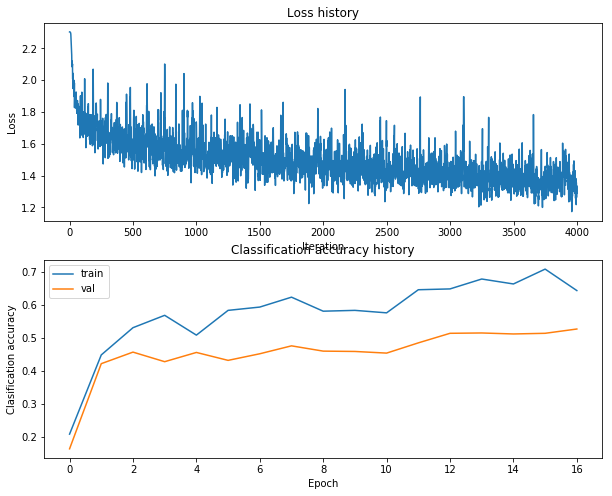

hidden_size: 2.000000e+02 learning_rates: 1.000000e-03 regularization_strengths: 0.000000e+00
iteration 0 / 4000: loss 2.302570
iteration 100 / 4000: loss 1.849860
iteration 200 / 4000: loss 1.790953
iteration 300 / 4000: loss 1.730235
iteration 400 / 4000: loss 1.493970
iteration 500 / 4000: loss 1.587503
iteration 600 / 4000: loss 1.371508
iteration 700 / 4000: loss 1.387024
iteration 800 / 4000: loss 1.423219
iteration 900 / 4000: loss 1.409997
iteration 1000 / 4000: loss 1.329100
iteration 1100 / 4000: loss 1.399744
iteration 1200 / 4000: loss 1.299561
iteration 1300 / 4000: loss 1.373031
iteration 1400 / 4000: loss 1.275944
iteration 1500 / 4000: loss 1.221890
iteration 1600 / 4000: loss 1.171021
iteration 1700 / 4000: loss 1.227809
iteration 1800 / 4000: loss 1.179805
iteration 1900 / 4000: loss 1.101346
iteration 2000 / 4000: loss 1.114728
iteration 2100 / 4000: loss 1.106880
iteration 2200 / 4000: loss 1.183474
iteration 2300 / 4000: loss 1.128701
iteration 2400 / 4000: loss 1.

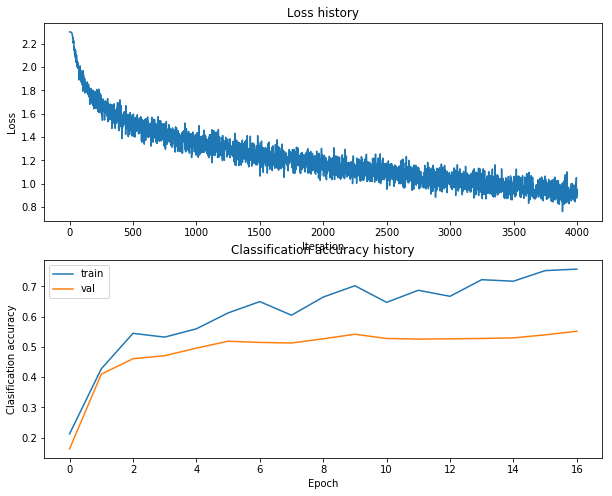

hidden_size: 2.000000e+02 learning_rates: 1.000000e-03 regularization_strengths: 5.000000e-01
iteration 0 / 4000: loss 2.304141
iteration 100 / 4000: loss 1.934688
iteration 200 / 4000: loss 1.739019
iteration 300 / 4000: loss 1.627218
iteration 400 / 4000: loss 1.623620
iteration 500 / 4000: loss 1.544013
iteration 600 / 4000: loss 1.514154
iteration 700 / 4000: loss 1.498794
iteration 800 / 4000: loss 1.452673
iteration 900 / 4000: loss 1.496077
iteration 1000 / 4000: loss 1.376650
iteration 1100 / 4000: loss 1.377793
iteration 1200 / 4000: loss 1.362007
iteration 1300 / 4000: loss 1.449117
iteration 1400 / 4000: loss 1.358048
iteration 1500 / 4000: loss 1.426815
iteration 1600 / 4000: loss 1.399110
iteration 1700 / 4000: loss 1.332130
iteration 1800 / 4000: loss 1.344762
iteration 1900 / 4000: loss 1.319759
iteration 2000 / 4000: loss 1.294408
iteration 2100 / 4000: loss 1.294319
iteration 2200 / 4000: loss 1.220688
iteration 2300 / 4000: loss 1.246317
iteration 2400 / 4000: loss 1.

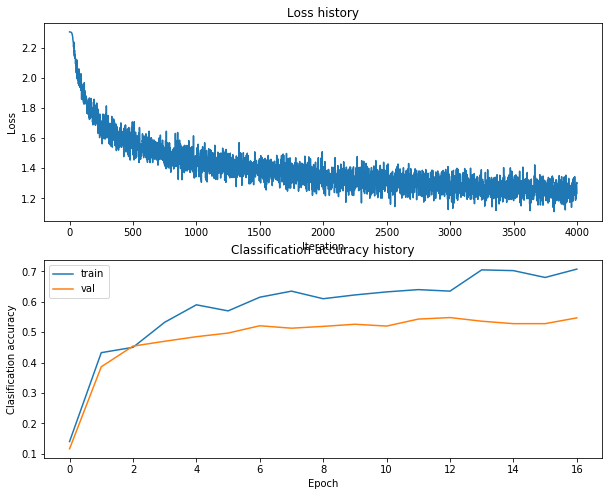

hidden_size: 2.000000e+02 learning_rates: 3.000000e-03 regularization_strengths: 0.000000e+00
iteration 0 / 4000: loss 2.302604
iteration 100 / 4000: loss 1.672222
iteration 200 / 4000: loss 1.611370
iteration 300 / 4000: loss 1.682706
iteration 400 / 4000: loss 1.587405
iteration 500 / 4000: loss 1.466042
iteration 600 / 4000: loss 1.675899
iteration 700 / 4000: loss 1.752427
iteration 800 / 4000: loss 1.701467
iteration 900 / 4000: loss 1.344255
iteration 1000 / 4000: loss 1.245295
iteration 1100 / 4000: loss 1.285523
iteration 1200 / 4000: loss 1.396566
iteration 1300 / 4000: loss 1.379068
iteration 1400 / 4000: loss 1.173241
iteration 1500 / 4000: loss 1.265068
iteration 1600 / 4000: loss 1.260693
iteration 1700 / 4000: loss 1.158618
iteration 1800 / 4000: loss 1.269823
iteration 1900 / 4000: loss 1.163162
iteration 2000 / 4000: loss 1.194384
iteration 2100 / 4000: loss 1.150073
iteration 2200 / 4000: loss 1.176078
iteration 2300 / 4000: loss 1.065257
iteration 2400 / 4000: loss 1.

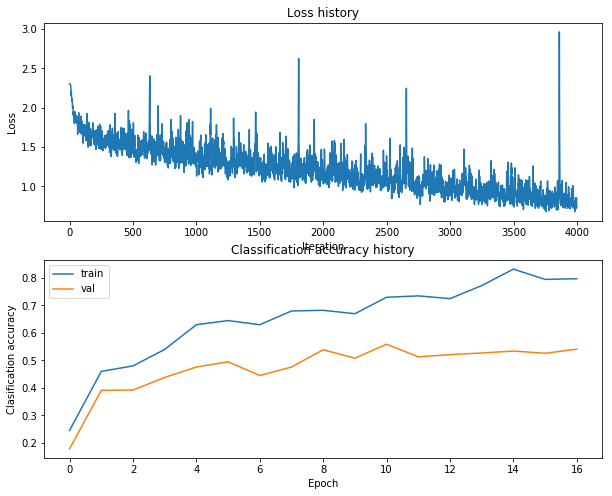

hidden_size: 2.000000e+02 learning_rates: 3.000000e-03 regularization_strengths: 5.000000e-01
iteration 0 / 4000: loss 2.304130
iteration 100 / 4000: loss 1.635600
iteration 200 / 4000: loss 1.714548
iteration 300 / 4000: loss 1.543293
iteration 400 / 4000: loss 1.598029
iteration 500 / 4000: loss 1.604566
iteration 600 / 4000: loss 1.661275
iteration 700 / 4000: loss 1.583032
iteration 800 / 4000: loss 1.507175
iteration 900 / 4000: loss 1.461676
iteration 1000 / 4000: loss 1.555098
iteration 1100 / 4000: loss 1.534020
iteration 1200 / 4000: loss 1.595823
iteration 1300 / 4000: loss 1.671804
iteration 1400 / 4000: loss 1.489066
iteration 1500 / 4000: loss 1.492341
iteration 1600 / 4000: loss 1.501990
iteration 1700 / 4000: loss 1.368813
iteration 1800 / 4000: loss 1.698500
iteration 1900 / 4000: loss 1.378085
iteration 2000 / 4000: loss 1.601054
iteration 2100 / 4000: loss 1.530845
iteration 2200 / 4000: loss 1.361638
iteration 2300 / 4000: loss 1.389479
iteration 2400 / 4000: loss 1.

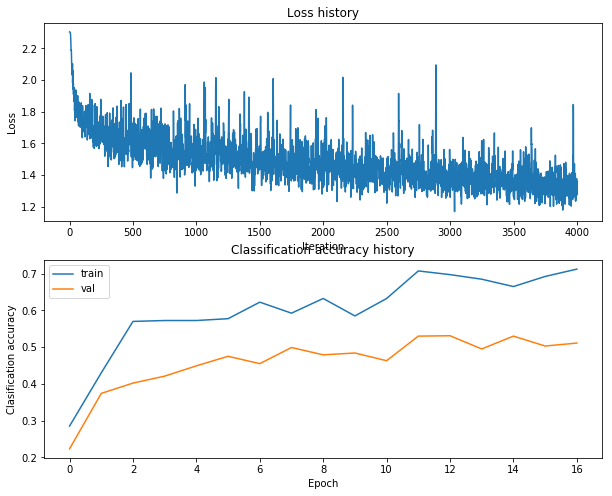

h 5.000000e+01 lr 1.000000e-03 reg 0.000000e+00 train accuracy: 0.592306 val accuracy: 0.513000
h 5.000000e+01 lr 1.000000e-03 reg 5.000000e-01 train accuracy: 0.573939 val accuracy: 0.520000
h 5.000000e+01 lr 3.000000e-03 reg 0.000000e+00 train accuracy: 0.620163 val accuracy: 0.500000
h 5.000000e+01 lr 3.000000e-03 reg 5.000000e-01 train accuracy: 0.540816 val accuracy: 0.463000
h 1.000000e+02 lr 1.000000e-03 reg 0.000000e+00 train accuracy: 0.648633 val accuracy: 0.528000
h 1.000000e+02 lr 1.000000e-03 reg 5.000000e-01 train accuracy: 0.614469 val accuracy: 0.538000
h 1.000000e+02 lr 3.000000e-03 reg 0.000000e+00 train accuracy: 0.669510 val accuracy: 0.531000
h 1.000000e+02 lr 3.000000e-03 reg 5.000000e-01 train accuracy: 0.609694 val accuracy: 0.520000
h 2.000000e+02 lr 1.000000e-03 reg 0.000000e+00 train accuracy: 0.689673 val accuracy: 0.534000
h 2.000000e+02 lr 1.000000e-03 reg 5.000000e-01 train accuracy: 0.639306 val accuracy: 0.541000
h 2.000000e+02 lr 3.000000e-03 reg 0.000

In [60]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
results = {}
best_val = -1
best_net = None
hidden_size = [50, 100, 200]
learning_rates = [1e-3, 3e-3]
regularization_strengths = [0, 0.5]

for h in hidden_size:
    for lr in learning_rates:
        for reg in regularization_strengths:
            print("hidden_size: %e learning_rates: %e regularization_strengths: %e" % (h, lr, reg)) 
            net = TwoLayerNet(input_size, h, num_classes)
            
            # Train the network
            stats = net.train(Xr, yr, Xv, yv,
                        num_iters=4000, batch_size=400,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=reg, verbose=True)
            
            ta = np.mean(yr == net.predict(Xr))
            va = np.mean(yv == net.predict(Xv))
            print('h %e lr %e reg %e train accuracy: %f val accuracy: %f' % (
                        h, lr, reg, ta, va))
            # Plot the loss function and train / validation accuracies
            plt.subplot(2, 1, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            
            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Clasification accuracy')
            plt.legend()
            plt.show()
            results[(h, lr, reg)] = (ta, va)
            if (va > best_val):
                best_val = va
                best_net = net
                
                
# Print out results.
for h, lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(h, lr, reg)]
    print('h %e lr %e reg %e train accuracy: %f val accuracy: %f' % (
                h, lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

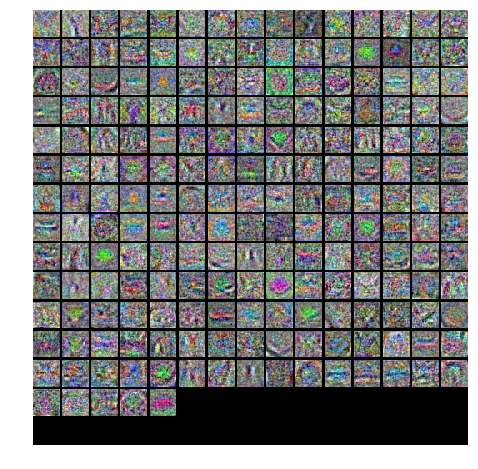

In [61]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [62]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.545


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*